In [21]:
import requests
import time
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
USERNAME ='OOIAPI-30AZZ33CYL06XZ'
TOKEN= 'M8OD8XIG5KD'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [7]:
data_request_url = DATA_API_BASE_URL+\
                    'RS03AXBS/'+\
                    'LJ03A/'+\
                    '12-CTDPFB301/'+\
                    'streamed/'+\
                    'ctdpf_optode_sample'+'?'+\
                    'beginDT=2015-06-01T01:00:01.000Z&'+\
                    'endDT=2015-07-30T01:00:01.000Z'

In [8]:
r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
data = r.json()

In [12]:
d1_url = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/friedrich.knuth@rutgers.edu/20171215T174215-RS03AXBS-LJ03A-12-CTDPFB301-streamed-ctdpf_optode_sample/deployment0001_RS03AXBS-LJ03A-12-CTDPFB301-streamed-ctdpf_optode_sample_20150601T010001.700849-20150612T235959.144016.nc'
d2_url = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/friedrich.knuth@rutgers.edu/20171215T174215-RS03AXBS-LJ03A-12-CTDPFB301-streamed-ctdpf_optode_sample/deployment0002_RS03AXBS-LJ03A-12-CTDPFB301-streamed-ctdpf_optode_sample_20150714T231829.456712-20150730T010000.809950.nc'

In [14]:
d1_ds = xr.open_dataset(d1_url)
d1_ds = d1_ds.swap_dims({'obs': 'time'})
d2_ds = xr.open_dataset(d2_url)
d2_ds = d2_ds.swap_dims({'obs': 'time'})

In [31]:
d1_df = d1_ds['seawater_pressure'].to_dataframe()
del d1_df.index.name
d1_df = d1_df['seawater_pressure']
d2_df = d2_ds['seawater_pressure'].to_dataframe()
del d2_df.index.name
d2_df = d2_df['seawater_pressure']

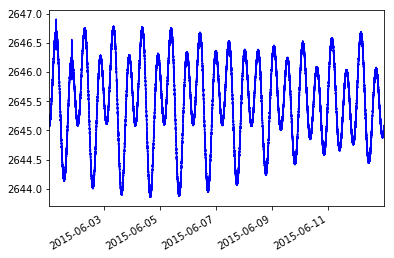

In [38]:
d1_df.plot(color='blue')
plt.show()

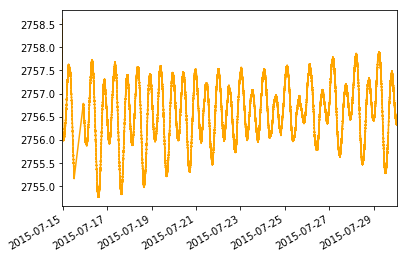

In [39]:
d2_df.plot(color='orange')
plt.show()

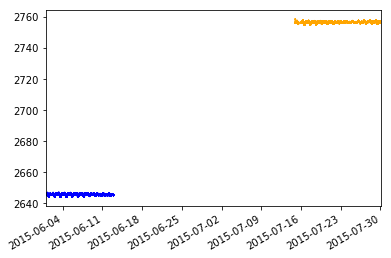

In [40]:
d1_df.plot(color='blue')
d2_df.plot(color='orange')
plt.show()